Decision Tree

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import graphviz
from sklearn import tree

In [13]:
data=pd.read_csv("george_marks.csv")
data.head()

,course,mean,sd,cat1,cat2,fat,totalmarks,grade
0,CSE2012,64.66,10.14,20.0,22.0,49.0,70,P
1,CSE2038,72.91,10.10,17.5,7.0,51.0,62,P
2,CSE2039,78.11,7.71,22.0,31.0,61.0,84,P
3,ECE2036,72.01,15.26,11.0,43.0,70.0,73,P
4,MAT2010,74.01,8.28,21.0,19.0,28.0,62,F


In [14]:
data

,course,mean,sd,cat1,cat2,fat,totalmarks,grade
0,CSE2012,64.66,10.14,20.0,22.0,49.00,70,P
1,CSE2038,72.91,10.10,17.5,7.0,51.00,62,P
2,CSE2039,78.11,7.71,22.0,31.0,61.00,84,P
3,ECE2036,72.01,15.26,11.0,43.0,70.00,73,P
4,MAT2010,74.01,8.28,21.0,19.0,28.00,62,F
5,CSE1022,80.62,5.76,15.0,15.0,65.00,83,P
6,CSE2006,76.81,9.21,17.0,17.0,59.00,74,P
7,CSE2005,81.52,6.17,15.0,24.5,76.67,84,P
8,CSE2011,76.04,8.77,24.0,20.0,65.00,76,P
9,CSE2004,87.59,3.25,25.0,19.0,76.67,87,P


In [5]:
#ignore this for now, want to use le-encoder
data['grade'].replace('P','1',inplace=True)
data['grade'].replace('F','0',inplace=True)
data=data.drop("course",axis=1)
X=data.iloc[:,:6]
y=data.grade

In [15]:
data=data.drop("course",axis=1)
X=data.iloc[:,:6]
y=data.grade

In [16]:
print(X)
print(y)

     mean     sd  cat1  cat2      fat  totalmarks
0   64.66  10.14  20.0  22.0    49.00          70
1   72.91  10.10  17.5   7.0    51.00          62
2   78.11   7.71  22.0  31.0    61.00          84
3   72.01  15.26  11.0  43.0    70.00          73
4   74.01   8.28  21.0  19.0    28.00          62
5   80.62   5.76  15.0  15.0    65.00          83
6   76.81   9.21  17.0  17.0    59.00          74
7   81.52   6.17  15.0  24.5    76.67          84
8   76.04   8.77  24.0  20.0    65.00          76
9   87.59   3.25  25.0  19.0    76.67          87
10  84.00   9.52  25.0  19.0  7667.00          83
0     P
1     P
2     P
3     P
4     F
5     P
6     P
7     P
8     P
9     P
10    P
Name: grade, dtype: object


In [17]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
print(y)
data.grade=y

[1 1 1 1 0 1 1 1 1 1 1]


In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)
print("The training dataset is:\n",xtrain,"\n",ytrain)
print("\ntesting datasetis:\n",xtest,"\n",ytest)

The training dataset is:
     mean     sd  cat1  cat2    fat  totalmarks
6  76.81   9.21  17.0  17.0  59.00          74
1  72.91  10.10  17.5   7.0  51.00          62
7  81.52   6.17  15.0  24.5  76.67          84
8  76.04   8.77  24.0  20.0  65.00          76
3  72.01  15.26  11.0  43.0  70.00          73
0  64.66  10.14  20.0  22.0  49.00          70
5  80.62   5.76  15.0  15.0  65.00          83 
 [1 1 1 1 1 1 1]

testing datasetis:
      mean    sd  cat1  cat2      fat  totalmarks
4   74.01  8.28  21.0  19.0    28.00          62
9   87.59  3.25  25.0  19.0    76.67          87
2   78.11  7.71  22.0  31.0    61.00          84
10  84.00  9.52  25.0  19.0  7667.00          83 
 [0 1 1 1]


In [19]:
#gini index
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X,y)
print(X)
print(y)

     mean     sd  cat1  cat2      fat  totalmarks
0   64.66  10.14  20.0  22.0    49.00          70
1   72.91  10.10  17.5   7.0    51.00          62
2   78.11   7.71  22.0  31.0    61.00          84
3   72.01  15.26  11.0  43.0    70.00          73
4   74.01   8.28  21.0  19.0    28.00          62
5   80.62   5.76  15.0  15.0    65.00          83
6   76.81   9.21  17.0  17.0    59.00          74
7   81.52   6.17  15.0  24.5    76.67          84
8   76.04   8.77  24.0  20.0    65.00          76
9   87.59   3.25  25.0  19.0    76.67          87
10  84.00   9.52  25.0  19.0  7667.00          83
[1 1 1 1 0 1 1 1 1 1 1]


[Text(0.5, 0.75, 'X[4] <= 38.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

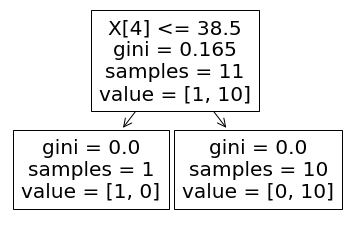

In [20]:
tree.plot_tree(clf)

In [21]:
#entropy
dt=tree.DecisionTreeClassifier(criterion='entropy')
model=dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(ypred)
print(ytest)
print(model.score(xtest,ytest))

[1 1 1 1]
[0 1 1 1]
0.75


In [22]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("george_marks")

'george_marks.pdf'

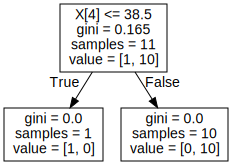

In [23]:
graph